## Módulo 01 - Introdução

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.set_option('display.max_columns', None)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
FILE = '../data/BancoDeDados.csv'

In [4]:
df = pd.read_csv(FILE)

In [10]:
df.head(2)

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,pedido_aprovado,pedido_entregador,pedido_entregue,data_estimada,id_vendedor,preco,frete,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [7]:
df.shape

(116581, 27)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [103]:
def plot_perc(col, df, title):
    g = sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    g.set_title(title, fontsize=15)
    g.set_xlabel(col, fontsize=10)
    g.set_ylabel('Quantidade', fontsize=10)
    # g.set_xticks(ticks=g.get_xticklabels())
    # g.get_yticklabels()
    g.set_xticklabels(labels=g.get_xticklabels(), rotation=45)

    sizes = list()
    for p in g.patches:
    #     print(p)
        height = p.get_height()
        sizes.append(height)
    #     print(p.get_x()), print(p.get_width())
        g.text(x=p.get_x()+p.get_width()/2, y=height+200, s='{:.0f}%'.format(height/len(df)*100), ha='center', va='bottom', fontsize=10)

    g.set_ylim(0, max(sizes) * 1.1); # Definindo o intervalo de y => mínimo=0, máximo = 10% a mais do valor máximo de y

    # g.text
    #     x => posição x onde o texto será colocado. No caso acima, foi utilizada a posição inicial do x (p.get_x()) + metade da largura da barra,
    #     para que o texto ficasse bem no meio da barrinha
    #     y => posição y onde o texto será colocado. No caso acima, foi utilizada a própria altura da barra, acrescido de 200 para que o texto não
    #     ficasse muito junto
    #     s => é o próprio conteúdo do texto, onde calculamos a representatividade de cada estado

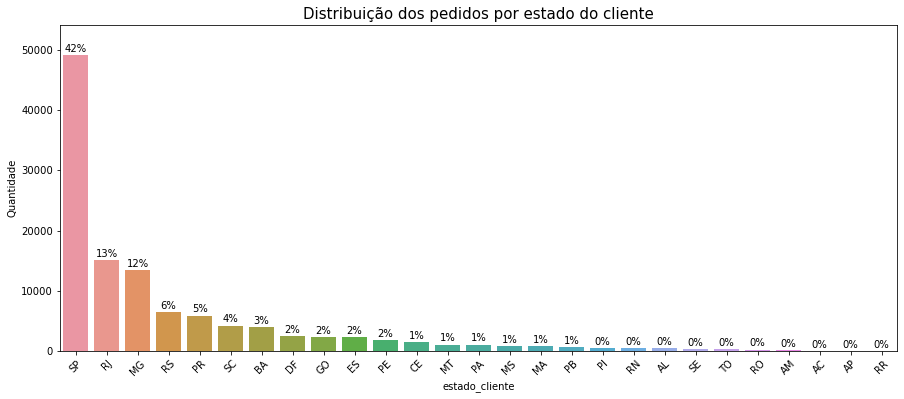

In [104]:
plot_perc(col='estado_cliente', df=df, title='Distribuição dos pedidos por estado do cliente')

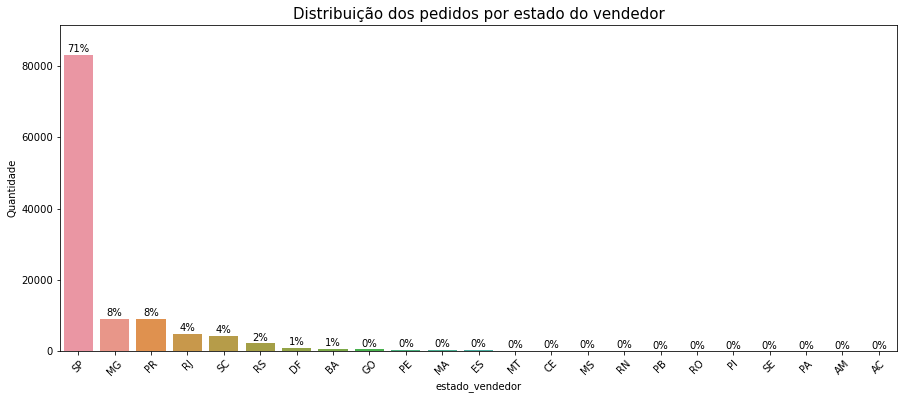

In [108]:
plot_perc(col='estado_vendedor', df=df, title='Distribuição dos pedidos por estado do vendedor')

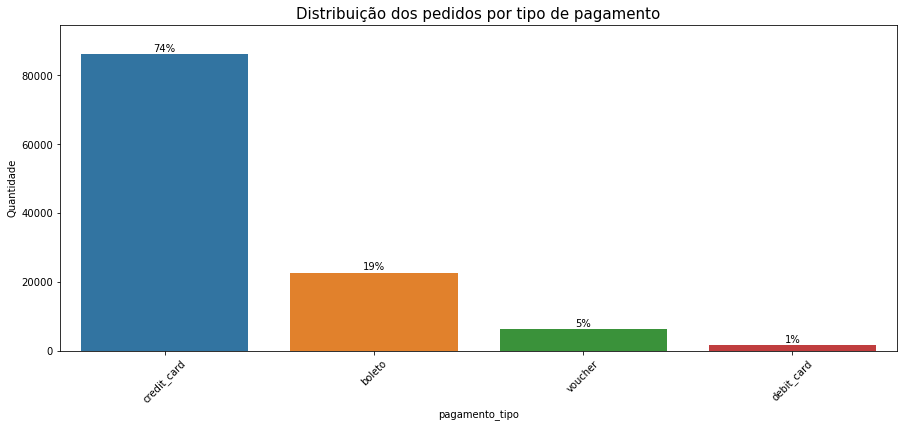

In [109]:
plot_perc(col='pagamento_tipo', df=df, title='Distribuição dos pedidos por tipo de pagamento')

Vimos que grande parte dos pedidos são de clientes do Sudeste, com uma concentração em SP. Também percebemos que +70% dos pedidos são de vendedores de SP. 74% dos pedidos são pagos com Cartão de Crédito e 19% com boleto.

Nesta aula, aprendemos:

- Quais as principais etapas em um problema de segmentação;
- Que tipo de dados vamos precisar obter;
- Como a análise exploratória pode ajudar a identificar insights;
- Como adicionar textos informativos em gráficos.